In [1]:
# Import libraries
import os
import numpy as np
from scipy.stats import kurtosis
from Functions.artifact_removal_tool import ART

In [13]:
# Test signal
## Parameters
window_length = 125     # Window length [n_samples]
n_clusters = 4          # Number of clusters for the k-means [n]
fd_threshold = 1.4      # Threshold value for the fractal dimension (FD) [A.U.]
ssa_threshold = 0.03    # Theshold value for SSA [%]
                        # eigenvalues > ssa_threshold are included in SSA
eeg_chan = 0            # EEG channel index or string name to use

# Path of data of interest
abs_path = os.getcwd()
data_path = '\\Data\\'
eeg_file = 'S3_eye_2_data.npz'  # String name of the file to load

# Import data
data = np.load(abs_path+data_path+eeg_file, allow_pickle=True)
eeg = data['conv'][0]   # EEG data [V]  
chans = data['chans']   # Channels [str]
srate = data['srate']   # Sampling rate [Hz]
time_vect = np.linspace(0, np.size(eeg,0)/srate, np.size(eeg,0)) # Generate time vector based on srate [sec]

art = ART(
    window_length= window_length,
    n_clusters = n_clusters,
    fd_threshold = fd_threshold,
    ssa_threshold = ssa_threshold,
)
artifact = art.remove_artifacts(eeg.T, srate)

In [9]:
a = data["conv"][0]

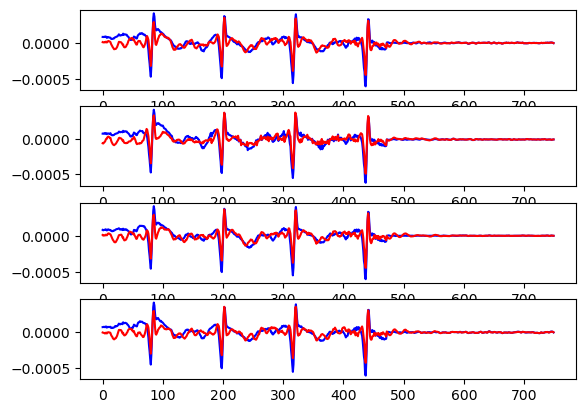

In [16]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,1)
for i in range(4):
    ax[i].plot(eeg[:,i], "b")
    ax[i].plot(artifact[i,:], 'r')

In [25]:
import warnings
warnings.filterwarnings('ignore')

%timeit -n 5 -r 5 art.remove_artifacts(eeg[:,:5].T, srate)

192 ms ± 7.96 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


In [26]:
3/.192


15.625

In [ ]:
%prun -s cumulative art.single_channel_artifact_removal(eeg[:,0], srate)